In [1]:
!pip install pandas

In [2]:
# importing libraries
import pandas as pd
import sqlite3 as sql
import numpy as np


In [3]:
#install the ipython-sql library
!pip install ipython-sql

In [4]:
#creating a connection
db_connection = sql.connect('new_sql_db')

In [5]:
#cursor
execute_sql=db_connection.cursor()

In [6]:
#read the csv file
dataset = pd.read_csv("C:\\Users\\imani\\OneDrive\\Desktop\\Fatema\\Mental_health_Analysis\\Impact_of_Remote_Work_on_Mental_Health.csv")
dataset

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [7]:
#insert the table into sql database
dataset.to_sql('remote', con = db_connection, if_exists = 'replace')

5000

In [8]:
#query table using sql
#read sql method
result = pd.read_sql(""" select * from remote""", con =db_connection)
result

,index,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,...,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,...,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,...,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,...,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,...,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,...,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,...,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,...,Low,Depression,Yes,Decrease,1,Satisfied,1,None,Average,Africa
4997,4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,...,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,...,Low,None,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [9]:
result = pd.read_sql(""" select * from remote
                          where age > 35 and work_location like 'remaote' or work_location like 'hybrid'
                          """, con =db_connection)
result

,index,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,...,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,...,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,...,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
2,5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,...,High,None,No,Increase,5,Unsatisfied,1,None,Average,South America
3,8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,...,High,None,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
4,9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,...,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,4991,EMP4992,60,Female,Data Scientist,IT,9,Hybrid,57,4,...,Low,Burnout,Yes,Increase,4,Satisfied,5,Weekly,Average,Oceania
1645,4992,EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,...,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa
1646,4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,...,Medium,None,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia
1647,4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,...,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania


In [10]:
# mental health conditions depend on work location


In [11]:
result = pd.read_sql("""select work_location,mental_health_condition ,count(*) as Num_employes_MH
from remote
group by mental_health_condition, work_location
order by work_location desc
                          """, con =db_connection)
result

,Work_Location,Mental_Health_Condition,Num_employes_MH
0,Remote,None,420
1,Remote,Anxiety,443
2,Remote,Burnout,438
3,Remote,Depression,413
4,Onsite,None,376
5,Onsite,Anxiety,407
6,Onsite,Burnout,442
7,Onsite,Depression,412
8,Hybrid,None,400
9,Hybrid,Anxiety,428


In [12]:
# work location and stress levels
result = pd.read_sql("""select work_location , stress_level, count(*)
from remote
group by work_location,stress_level
order by stress_level
                          """, con =db_connection)
result

,Work_Location,Stress_Level,count(*)
0,Hybrid,High,561
1,Onsite,High,535
2,Remote,High,590
3,Hybrid,Low,543
4,Onsite,Low,555
5,Remote,Low,547
6,Hybrid,Medium,545
7,Onsite,Medium,547
8,Remote,Medium,577


In [13]:
# employees who have great work life balance
result = pd.read_sql(""" select count(employee_id) as count_employees, work_life_balance_rating
from remote
group by work_life_balance_rating
order by work_life_balance_rating
                          """, con =db_connection)
result

,count_employees,Work_Life_Balance_Rating
0,1023,1
1,967,2
2,1053,3
3,980,4
4,977,5


In [14]:
#  number of remote workers whose stress levels are high
result = pd.read_sql(""" select work_location, count(stress_level) 
from remote
where work_location like 'remote' and stress_level like 'high'
group by work_location
                          """, con =db_connection)
result

,Work_Location,count(stress_level)
0,Remote,590


In [42]:
# number of employees whose work location is remote and has anxiety 
result = pd.read_sql(""" select work_location, mental_health_condition, count(employee_id) as Number_of_employees 
from remote
where lower(work_location) ='remote' and lower(mental_health_condition) ='anxiety'
group by work_location, mental_health_condition 
                          """, con =db_connection)
result

,Work_Location,Mental_Health_Condition,Number_of_employees
0,Remote,Anxiety,443


In [16]:
# when productivity increased did mental_health_condition get better
result = pd.read_sql(""" select productivity_change,mental_health_condition,count(employee_id)
from remote

group by productivity_change,mental_health_condition
                          """, con =db_connection)
result

,Productivity_Change,Mental_Health_Condition,count(employee_id)
0,Decrease,None,423
1,Decrease,Anxiety,422
2,Decrease,Burnout,431
3,Decrease,Depression,461
4,Increase,None,382
5,Increase,Anxiety,426
6,Increase,Burnout,424
7,Increase,Depression,354
8,No Change,None,391
9,No Change,Anxiety,430


In [17]:
#work hours and mental health
result = pd.read_sql(""" select avg(hours_worked_per_week), mental_health_condition
from remote

group by  mental_health_condition 
                          """, con =db_connection)
result

,avg(hours_worked_per_week),Mental_Health_Condition
0,39.374582,None
1,39.407668,Anxiety
2,40.031250,Burnout
3,39.629213,Depression


In [18]:
#for avg number of hours which job role has what stress level , formatting to avg hours
result = pd.read_sql(""" select avg(hours_worked_per_week), job_role,stress_level
from remote

group by  job_role,stress_level
order by avg(hours_worked_per_week) desc
                          """, con =db_connection)
result

,avg(hours_worked_per_week),Job_Role,Stress_Level
0,40.642023,Project Manager,Medium
1,40.497890,Marketing,Medium
2,40.488889,Software Engineer,Low
3,40.478632,Software Engineer,High
4,40.458150,HR,High
5,40.256917,Sales,High
6,40.070539,Sales,Low
7,40.062222,Marketing,High
8,39.926641,Designer,Low
9,39.884921,Software Engineer,Medium


In [19]:
# does more number of hours worked gave them higher productivity
result = pd.read_sql(""" select avg(hours_worked_per_week), job_role,productivity_change
from remote

group by  job_role,productivity_change
order by avg(hours_worked_per_week) desc
                          """, con =db_connection)
result

,avg(hours_worked_per_week),Job_Role,Productivity_Change
0,41.331878,Sales,Increase
1,41.046025,Project Manager,No Change
2,40.669291,Software Engineer,No Change
3,40.456221,Marketing,No Change
4,40.320000,Software Engineer,Increase
5,40.299107,HR,No Change
6,40.198198,Project Manager,Increase
7,40.029167,Marketing,Decrease
8,39.843750,HR,Decrease
9,39.788793,Software Engineer,Decrease


In [20]:
#Are employees working more hours remotely .
result = pd.read_sql(""" select avg(hours_worked_per_week), work_location
from remote

group by  work_location
order by avg(hours_worked_per_week) desc
                          """, con =db_connection)
result

,avg(hours_worked_per_week),Work_Location
0,39.820403,Onsite
1,39.585810,Hybrid
2,39.445741,Remote


In [21]:
#avg hours , work location and stress levels
result = pd.read_sql(""" select avg(hours_worked_per_week), work_location,stress_level
from remote

group by  work_location, stress_level
order by avg(hours_worked_per_week) desc
                          """, con =db_connection)
result

,avg(hours_worked_per_week),Work_Location,Stress_Level
0,40.041121,Onsite,High
1,40.029250,Onsite,Medium
2,39.955437,Hybrid,High
3,39.596610,Remote,High
4,39.401802,Onsite,Low
5,39.398165,Hybrid,Medium
6,39.396880,Remote,Medium
7,39.392265,Hybrid,Low
8,39.334552,Remote,Low


In [22]:
#avg number of hours worked and isolation rating 
result = pd.read_sql(""" select avg(hours_worked_per_week), work_location,social_isolation_rating
from remote
where social_isolation_rating = 5
group by  work_location,social_isolation_rating
order by avg(hours_worked_per_week) desc
                          """, con =db_connection)
result

,avg(hours_worked_per_week),Work_Location,Social_Isolation_Rating
0,40.161994,Onsite,5
1,38.962264,Hybrid,5
2,38.437700,Remote,5


In [23]:
#Access to mental health
result = pd.read_sql(""" select count(employee_id),Access_to_mental_health_resources
from remote

group by Access_to_mental_health_resources 

                          """, con =db_connection)
result


,count(employee_id),Access_to_Mental_Health_Resources
0,2553,No
1,2447,Yes


In [24]:
#does stress level condition increases if no mental health acsess is given
result = pd.read_sql(""" select count(employee_id),Access_to_mental_health_resources,stress_level
from remote
where stress_level ='High' and Access_to_mental_health_resources = 'No'

group by Access_to_mental_health_resources, stress_level

                          """, con =db_connection)
result


,count(employee_id),Access_to_Mental_Health_Resources,Stress_Level
0,817,No,High


In [25]:
#percentage of employees who have high stress and no access to mental resources
result = pd.read_sql(r"""
SELECT 
    (COUNT(CASE WHEN cast(Access_to_Mental_Health_Resources as int) = 0 AND TRIM(LOWER(Stress_Level)) = 'high' THEN 1 END) * 100.0 / COUNT(*)) AS percentage_high_stress_no_access
FROM 
    remote;
""", con =db_connection)
result


,percentage_high_stress_no_access
0,33.72


In [26]:
# has productivity changed if no mental health access is given
result = pd.read_sql(""" select count(employee_id),Access_to_mental_health_resources,productivity_change
from remote


group by Access_to_mental_health_resources, productivity_change
order by count(employee_id) desc

                          """, con =db_connection)
result

,count(employee_id),Access_to_Mental_Health_Resources,Productivity_Change
0,892,Yes,Decrease
1,874,No,No Change
2,845,No,Decrease
3,834,No,Increase
4,803,Yes,No Change
5,752,Yes,Increase


In [27]:
# virtual meetings and social isolation
result = pd.read_sql(""" SELECT 
    Stress_Level,
    COUNT(*) AS employee_count
FROM 
    remote
WHERE 
    Number_of_Virtual_Meetings > 10
GROUP BY 
    Stress_Level

                          """, con =db_connection)
result

,Stress_Level,employee_count
0,High,519
1,Low,522
2,Medium,525


In [28]:
#creating meeting per week range and find the avg social isolation rating
result = pd.read_sql(""" SELECT 
        CASE 
            WHEN Number_of_Virtual_Meetings <= 5 THEN '0-5'
            WHEN Number_of_Virtual_Meetings <= 10 THEN '6-10'
            WHEN Number_of_Virtual_Meetings <= 15 THEN '11-15'
            WHEN Number_of_Virtual_Meetings <= 20 THEN '16-20'
            ELSE '20+' 
        END AS meeting_range,
        AVG(Social_Isolation_Rating) AS avg_social_isolation_rating
    FROM 
        remote
    GROUP BY 
        meeting_range
    ORDER BY 
        meeting_range

                          """, con =db_connection)
result

,meeting_range,avg_social_isolation_rating
0,0-5,2.999459
1,11-15,3.005109
2,6-10,2.976055


In [29]:
!pip install matplotlib


In [30]:
!pip install seaborn

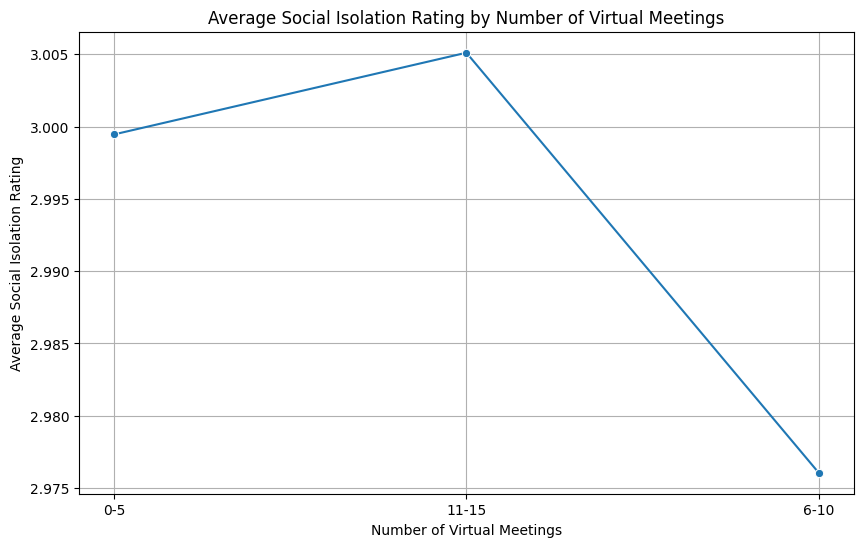

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=result, x='meeting_range', y='avg_social_isolation_rating', marker='o')
plt.title('Average Social Isolation Rating by Number of Virtual Meetings')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Average Social Isolation Rating')
plt.grid()
plt.show()

In [32]:
#Explore how the work-life balance rating affects stress levels and mental health.
result = pd.read_sql(""" SELECT work_life_balance_rating
    ,
    COUNT(*) AS employee_count
FROM 
    remote
where stress_level = 'High'
GROUP BY 
     work_life_balance_rating
     
order by employee_count desc

                          """, con =db_connection)
result

,Work_Life_Balance_Rating,employee_count
0,3,374
1,4,342
2,5,333
3,1,326
4,2,311


In [33]:
#make work life balance bins 
#how is the work life balance  stress level 
result = pd.read_sql(""" SELECT 
    CASE 
        WHEN work_life_balance_rating > 3 THEN 'Better Work-Life Balance'
        ELSE 'Poorer Work-Life Balance'
    END AS work_life_balance_group,
    stress_level,
    COUNT(*) AS employee_count
FROM 
    remote
GROUP BY 
    CASE 
        WHEN work_life_balance_rating > 3 THEN 'Better Work-Life Balance'
        ELSE 'Poorer Work-Life Balance'
    END, 
    stress_level

                          """, con =db_connection)
result

,work_life_balance_group,Stress_Level,employee_count
0,Better Work-Life Balance,High,675
1,Better Work-Life Balance,Low,660
2,Better Work-Life Balance,Medium,622
3,Poorer Work-Life Balance,High,1011
4,Poorer Work-Life Balance,Low,985
5,Poorer Work-Life Balance,Medium,1047


In [34]:
#percentage of high stress level
result = pd.read_sql(""" SELECT 
    CASE 
        WHEN work_life_balance_rating > 3 THEN 'Better Work-Life Balance'
        ELSE 'Poorer Work-Life Balance'
    END AS work_life_balance_group,
    COUNT(*) AS employee_count,
    SUM(CASE WHEN stress_level = 'High' THEN 1 ELSE 0 END) AS high_stress_count,
    (SUM(CASE WHEN stress_level = 'High' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS percentage_high_stress
FROM 
    remote
GROUP BY 
    CASE 
        WHEN work_life_balance_rating > 3 THEN 'Better Work-Life Balance'
        ELSE 'Poorer Work-Life Balance'
    END;

                          """, con =db_connection)
result

,work_life_balance_group,employee_count,high_stress_count,percentage_high_stress
0,Better Work-Life Balance,1957,675,34.491569
1,Poorer Work-Life Balance,3043,1011,33.223792


In [35]:
#correlation between changes in productivity and mental health conditions
result = pd.read_sql(""" SELECT productivity_change, mental_health_condition,
           COUNT(*) AS employee_count
    FROM remote
    WHERE productivity_change = 'Decrease' OR productivity_change = 'Increase'
    GROUP BY productivity_change, mental_health_condition
    ORDER BY employee_count DESC

                          """, con =db_connection)
result

,Productivity_Change,Mental_Health_Condition,employee_count
0,Decrease,Depression,461
1,Decrease,Burnout,431
2,Increase,Anxiety,426
3,Increase,Burnout,424
4,Decrease,None,423
5,Decrease,Anxiety,422
6,Increase,None,382
7,Increase,Depression,354


In [36]:
#Do employees with anxiety or depression experience decreases in productivity, or is there no significant impact?
result = pd.read_sql(""" SELECT productivity_change, mental_health_condition,
           COUNT(*) AS employee_count
    FROM remote
    WHERE mental_health_condition ='Anxiety' OR  mental_health_condition = 'Depression'
    GROUP BY productivity_change, mental_health_condition
    ORDER BY employee_count DESC

                          """, con =db_connection)
result

,Productivity_Change,Mental_Health_Condition,employee_count
0,Decrease,Depression,461
1,No Change,Depression,431
2,No Change,Anxiety,430
3,Increase,Anxiety,426
4,Decrease,Anxiety,422
5,Increase,Depression,354


In [37]:
# checking if their sleep or activity has changed with employees who have anxiety or depression but productivity has increased or not changed
result = pd.read_sql(""" SELECT productivity_change, mental_health_condition,physical_activity,Sleep_Quality,
           COUNT(*) AS employee_count
    FROM remote
   where (mental_health_condition = 'Anxiety' OR mental_health_condition = 'Depression') 
        AND (productivity_change = 'No Change' OR productivity_change = 'Increase')
    GROUP BY productivity_change, mental_health_condition,physical_activity,Sleep_Quality
    ORDER BY employee_count DESC

                          """, con =db_connection)
result

,Productivity_Change,Mental_Health_Condition,Physical_Activity,Sleep_Quality,employee_count
0,No Change,Anxiety,Daily,Good,61
1,No Change,Anxiety,Weekly,Average,58
2,Increase,Anxiety,Weekly,Poor,56
3,Increase,Anxiety,Daily,Average,55
4,Increase,Anxiety,Weekly,Good,54
5,No Change,Anxiety,Weekly,Good,54
6,No Change,Depression,Daily,Good,54
7,Increase,Anxiety,Weekly,Average,53
8,No Change,Depression,Weekly,Average,51
9,Increase,Anxiety,None,Average,49


In [38]:
#concerning employees  who have depression and do not have any physical activity and sleep quality is poor
result = pd.read_sql(""" SELECT productivity_change, mental_health_condition,physical_activity,Sleep_Quality,
           COUNT(*) AS employee_count
    FROM remote
  where (mental_health_condition IN ('Anxiety', 'Depression')) 
        AND (productivity_change IN ('No Change', 'Increase'))
        AND (physical_activity = 'None' OR physical_activity IS NULL) 
        AND (Sleep_Quality = 'Poor' OR Sleep_Quality IS NULL)
    GROUP BY productivity_change, mental_health_condition,physical_activity,Sleep_Quality
    ORDER BY employee_count DESC

                          """, con =db_connection)
result

,Productivity_Change,Mental_Health_Condition,Physical_Activity,Sleep_Quality,employee_count
0,Increase,Depression,None,Poor,48
1,No Change,Anxiety,None,Poor,45
2,No Change,Depression,None,Poor,44
3,Increase,Anxiety,None,Poor,37


In [43]:
#Do employees who engage in physical activity or have better sleep quality 
result = pd.read_sql(""" SELECT  physical_activity,Sleep_Quality,
           COUNT(*) AS employee_count
    FROM remote
  where 
      (physical_activity = 'None' OR physical_activity IS NULL) 
        AND (Sleep_Quality = 'Poor' OR Sleep_Quality IS NULL)
    GROUP BY  physical_activity,Sleep_Quality
    ORDER BY employee_count DESC

                          """, con =db_connection)
result

,Physical_Activity,Sleep_Quality,employee_count
0,None,Poor,554


In [40]:
result = pd.read_sql(""" SELECT  physical_activity,Sleep_Quality,
           COUNT(*) AS employee_count
    FROM remote

    GROUP BY  physical_activity,Sleep_Quality
    ORDER BY employee_count DESC

                          """, con =db_connection)
result

,Physical_Activity,Sleep_Quality,employee_count
0,Weekly,Poor,606
1,Weekly,Good,577
2,Weekly,Average,572
3,Daily,Good,559
4,None,Poor,554
5,None,Good,551
6,Daily,Average,532
7,Daily,Poor,525
8,None,Average,524
